## Graded Assignment - 2 (Question 2 & 3)

#### For reference ##########################
#### df - This represents dataframe created from original data
#### df_percentile - This represents dataframe by removing OUTLIERS using percentile method
#### df_iqr - This represents dataframe by removing OUTLIERS using IQR method

##### =======================================================================================================
### Q2. Using the same dataset, find the outliers in the dataset using [1%,99%] method and IQR method.(5 mark)
##### =======================================================================================================

In [1]:
# Importing required supporting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Creating DF object fromn the Application records

df = pd.read_csv('C:\AI-ML\SampleData\Application_record.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Graphs before removing OUTLIERS i.e graphs created using original dataframe

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

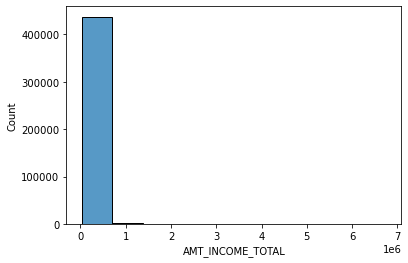

In [4]:
# Histogram based on df (with outliers)
sns.histplot(data=df, x='AMT_INCOME_TOTAL', bins=10)

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

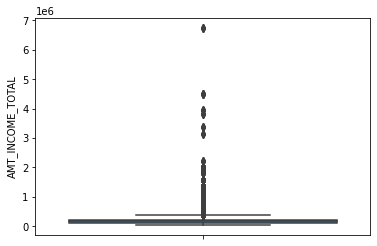

In [5]:
# boxplot based on df (with outliers)
sns.boxplot(data = df, y = 'AMT_INCOME_TOTAL')

In [6]:
df.describe(include='all',percentiles=[0.01,0.25,0.5,0.75,0.99])

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
1%,5.024430e+06,NaN,NaN,NaN,0.000000,5.400000e+04,NaN,NaN,NaN,NaN,-24013.000000,-10913.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000


#### ==============================================
#### 1. Removing OUTLIERS Using Percentile method[1%,99%]
#### ==============================================

In [21]:
min = df['AMT_INCOME_TOTAL'].quantile(0.01)
max = df['AMT_INCOME_TOTAL'].quantile(0.99)


print('Minimum boundary outlier {}' .format(min))
print('Maximum boundary outlier {}' .format(max))

# the below code will provide the details of all the records which falls under OUTLIER criteria
df_outliers = df[(df.AMT_INCOME_TOTAL > max) | (df.AMT_INCOME_TOTAL < min)]
print(df_outliers.AMT_INCOME_TOTAL.size)


df_percentile = df[(df.AMT_INCOME_TOTAL < max) & (df.AMT_INCOME_TOTAL > min)]
print(df_percentile.AMT_INCOME_TOTAL.size)

# "df" represents with outliers
# "df_percentile" represents without outlier  

# another way to find min and max not used
#    P = np.percentile(df.AMT_INCOME_TOTAL, [1, 99])
#    new_df = df[(df.AMT_INCOME_TOTAL > P[0]) & (df.AMT_INCOME_TOTAL < P[1])]

Minimum boundary outlier 54000.0
Maximum boundary outlier 540000.0
6878
428460


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

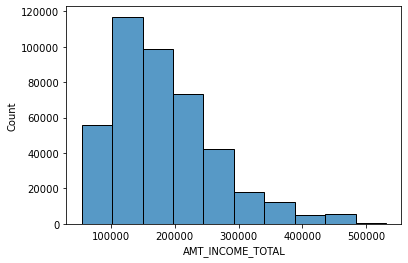

In [8]:
# ==== Please refer above section for graphs with OUtLIERS ====
# Histogram based on df_percentile (after removing outliers using percentile approach)

sns.histplot(data=df_percentile, x='AMT_INCOME_TOTAL', bins=10)

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

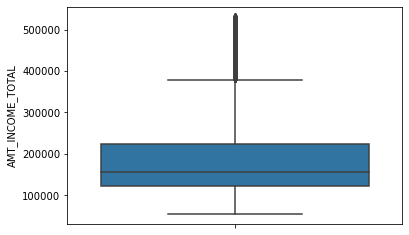

In [9]:
# boxplot based on df_percentile (after removing outliers using percentile)

sns.boxplot(data = df_percentile, y = 'AMT_INCOME_TOTAL')

##### =======================================================================================================
#### 2. Removing OUTLIERS using IQR method
##### =======================================================================================================

In [10]:
# Below steps calculate first and third quarter details 
iqr75, iqr25 = np.percentile(df["AMT_INCOME_TOTAL"],[75,25])
iqr=iqr75-iqr25
print('Iqr = {}' .format(iqr))

# Calculate upper and lower limits for outliers
Upper = iqr75 + 1.5*iqr
Lower = iqr25 - 1.5*iqr

print('Upper boundary - {}'.format(Upper))
print('Lower boundary - {}'.format(Lower))

df_iqr = df[(df.AMT_INCOME_TOTAL < Upper) & (df.AMT_INCOME_TOTAL > Lower)]

# another way to calculate UPPER and LOWER boundaries for outliers
# Upper = np.percentile(df["AMT_INCOME_TOTAL"], 75) + 1.5*iqr
# Lower = np.percentile(df["AMT_INCOME_TOTAL"], 25) - 1.5*iqr




Iqr = 103500.0
Upper boundary - 380250.0
Lower boundary - -33750.0


In [11]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419449 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   419449 non-null  int64  
 1   CODE_GENDER          419449 non-null  object 
 2   FLAG_OWN_CAR         419449 non-null  object 
 3   FLAG_OWN_REALTY      419449 non-null  object 
 4   CNT_CHILDREN         419449 non-null  int64  
 5   AMT_INCOME_TOTAL     419449 non-null  float64
 6   NAME_INCOME_TYPE     419449 non-null  object 
 7   NAME_EDUCATION_TYPE  419449 non-null  object 
 8   NAME_FAMILY_STATUS   419449 non-null  object 
 9   NAME_HOUSING_TYPE    419449 non-null  object 
 10  DAYS_BIRTH           419449 non-null  int64  
 11  DAYS_EMPLOYED        419449 non-null  int64  
 12  FLAG_MOBIL           419449 non-null  int64  
 13  FLAG_WORK_PHONE      419449 non-null  int64  
 14  FLAG_PHONE           419449 non-null  int64  
 15  FLAG_EMAIL       

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

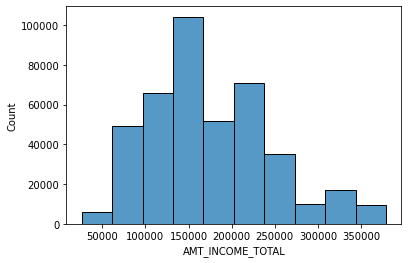

In [12]:
# Histogram based on df_iqr (without outliers using IQR method)

sns.histplot(data=df_iqr, x='AMT_INCOME_TOTAL', bins=10)

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

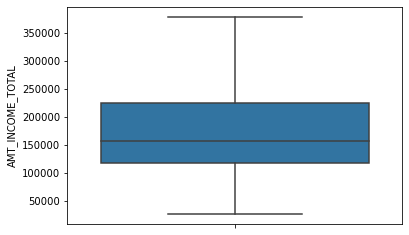

In [13]:
# boxplot based on df_iqr (without outliers using IQR method)

sns.boxplot(data = df_iqr, y = 'AMT_INCOME_TOTAL')

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='AMT_INCOME_TOTAL'>

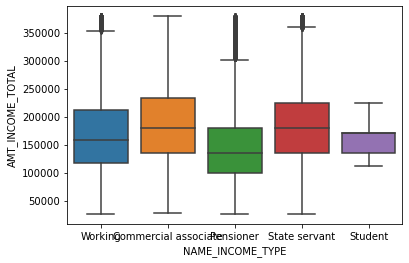

In [14]:
# boxplot based on df_iqr (without outliers using IQR method)

sns.boxplot(data = df_iqr, y = "AMT_INCOME_TOTAL", x = "NAME_INCOME_TYPE")

##### =======================================================================================================
## Q3. Create a distribution plot before and after updating the outlier values with the upper bound/lower bound.(5 mark)
##### =======================================================================================================

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

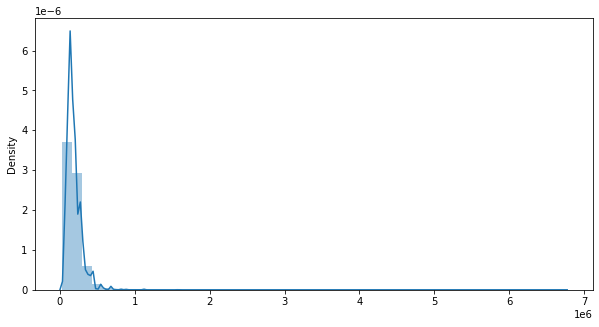

In [15]:
# Distplot without removing outliers

plt.figure(figsize = (10,5))
sns.distplot(x = df["AMT_INCOME_TOTAL"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

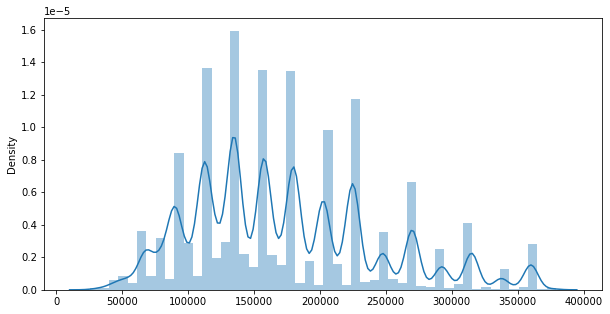

In [16]:
# Distplot after removing outliers using IQR method

plt.figure(figsize = (10,5))
sns.distplot(x = df_iqr["AMT_INCOME_TOTAL"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

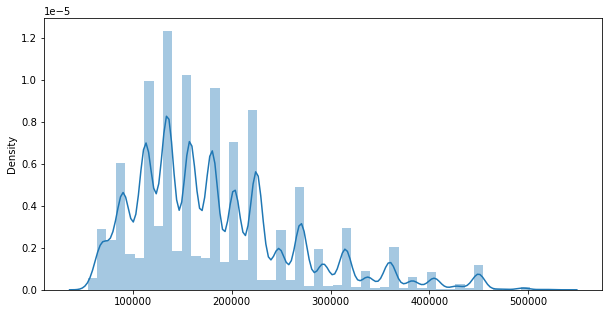

In [17]:
# Distplot after removing outliers using Percentile method

plt.figure(figsize = (10,5))
sns.distplot(x = df_percentile["AMT_INCOME_TOTAL"])

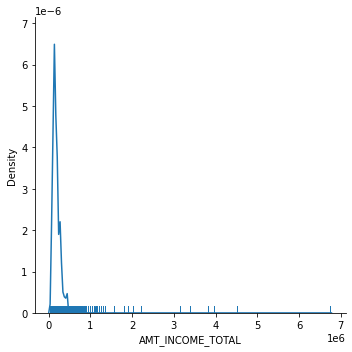

In [18]:
# displot (kde) without removing outliers

sns.displot(data = df, x = "AMT_INCOME_TOTAL", kind = "kde", rug = True)

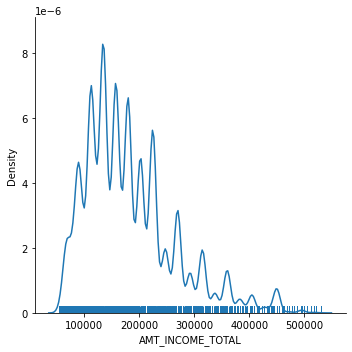

In [19]:
# displot (kde) after removing outliers (using percentile method)

sns.displot(data = df_percentile, x = "AMT_INCOME_TOTAL", kind = "kde", rug = True)

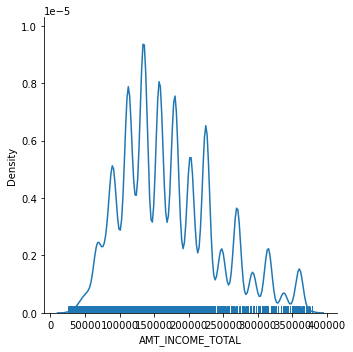

In [20]:
# displot (kde) after removing outliers (using IQR method)

sns.displot(data = df_iqr, x = "AMT_INCOME_TOTAL", kind = "kde", rug = True)